**Week** 4. 

# Week 4: Alameda Country Housing Price and Income Analysis (Viswanathan)

#Installations and Importing Libraries

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
pip install geopandas #need to install before using

In [22]:
#importing libraries that I plan to use

#Arrays, Tables, and Dataframe Libraries
from datascience import *
import pandas as pd 
import numpy as np

#Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

#Tokenization and Stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Webscraping
import requests
from bs4 import BeautifulSoup


#Webscraping Attempts to Collect Data

In [23]:
url = "https://www.zillow.com/homes/Berkeley,-CA_rb/"


r = requests.get(url)
print(r.content[:100])

b'<html><head><meta name="robots" content="noindex, nofollow"/><link href="https://www.zillowstatic.co'


In [24]:
r.status_code
#200 means success -- Other codes means construction error

200

In [25]:
soup = BeautifulSoup(r.content, 'html.parser')
soup

<html><head><meta content="noindex, nofollow" name="robots"/><link href="https://www.zillowstatic.com/vstatic/80d5e73/static/css/z-pages/captcha.css" media="screen" rel="stylesheet" type="text/css"/><script>
        window._pxAppId = 'PXHYx10rg3';
        window._pxJsClientSrc = '/HYx10rg3/init.js';
        window._pxHostUrl = '/HYx10rg3/xhr';
        window._pxFirstPartyEnabled = true;
        window._pxreCaptchaTheme='light';
    </script><script src="https://captcha.px-cdn.net/PXHYx10rg3/captcha.js?a=c&amp;m=0" type="text/javascript"></script>
<script>
        function getQueryString(name, url) {
            if (!url) url = window.location.href;
            name = name.replace(/[\[\]]/g, "\\$&");
            var regex = new RegExp("[?&]" + name + "(=([^&#]*)|&|#|$)"),
                results = regex.exec(url);
            if (!results) return null;
            if (!results[2]) return '';
            return decodeURIComponent(results[2].replace(/\+/g, " "));
        }
        documen

It seems like my attempt at webscrapping isn't working as intended because data like the homes listed do not show up in the html

#Loading CSV (downloaded through Zillow API) into a Pandas Dataframe

In [26]:
zillow_data = pd.read_csv("/content/drive/MyDrive/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
zillow_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,200075.0,198830.0,198897.0,198875.0,199330.0,199883.0,199785.0,200486.0,200791.0,202185.0,203256.0,204599.0,205854.0,208337.0,209743.0,210538.0,211254.0,212008.0,214267.0,214731.0,216143.0,215848.0,217565.0,219811.0,222770.0,225601.0,229202.0,233366.0,236664.0,240139.0,242354.0,...,1017039.0,1027584.0,1038953.0,1058026.0,1062802.0,1072237.0,1070957.0,1083433.0,1078314.0,1078464.0,1069361.0,1065229.0,1083891.0,1095244.0,1116158.0,1110777.0,1110752.0,1100678.0,1081990.0,1056843.0,1052388.0,1056984.0,1068839.0,1065266.0,1064037.0,1051885.0,1033799.0,1025042.0,1023762.0,1030265.0,1044070.0,1059557.0,1067331.0,1068534.0,1069807.0,1081347.0,1081855.0,1092196.0,1104487.0,1121360.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,266953.0,266255.0,265226.0,264005.0,262194.0,261265.0,259796.0,261551.0,263668.0,268043.0,271194.0,273875.0,275390.0,276139.0,277481.0,277514.0,278723.0,278493.0,279105.0,273341.0,266862.0,256874.0,250329.0,245524.0,243611.0,243305.0,243173.0,244126.0,244968.0,246046.0,247259.0,...,500490.0,503618.0,503321.0,501952.0,501775.0,502644.0,501921.0,501393.0,501173.0,502087.0,503423.0,503898.0,501679.0,498741.0,497160.0,497229.0,497914.0,497895.0,498210.0,497380.0,495573.0,493739.0,492233.0,491211.0,491579.0,492792.0,495301.0,496676.0,497142.0,497434.0,498824.0,500922.0,503725.0,506441.0,508991.0,511451.0,513654.0,515983.0,517482.0,519569.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,270721.0,270778.0,270928.0,271892.0,273296.0,274445.0,274827.0,274941.0,275373.0,276192.0,277288.0,278418.0,279930.0,282078.0,284714.0,286627.0,288259.0,290317.0,293412.0,296630.0,299798.0,302747.0,305990.0,309695.0,313155.0,315606.0,317359.0,318912.0,320546.0,322994.0,325994.0,...,1118937.0,1143405.0,1157115.0,1166380.0,1153814.0,1149301.0,1149279.0,1164975.0,1182952.0,1194928.0,1187956.0,1161743.0,1135281.0,1109912.0,1109211.0,1096399.0,1094837.0,1090185.0,1090223.0,1083327.0,1062489.0,1056177.0,1064622.0,1090206.0,1116017.0,1126414.0,1126998.0,1128540.0,1131833.0,1131653.0,1131516.0,1133589.0,1144334.0,1144987.0,1140435.0,1130923.0,1121519.0,1120821.0,1118048.0,1120428.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,202764.0,203015.0,202815.0,201613.0,200462.0,199788.0,200559.0,200243.0,199583.0,198783.0,199696.0,201400.0,203988.0,205247.0,206537.0,208768.0,211253.0,212984.0,212649.0,214817.0,217355.0,219585.0,218642.0,216914.0,214151.0,212522.0,210797.0,209847.0,208798.0,208384.0,208275.0,...,336842.0,337027.0,336740.0,337165.0,338230.0,339089.0,339159.0,339568.0,340104.0,340498.0,340884.0,340333.0,340630.0,340471.0,340445.0,339382.0,338793.0,338852.0,339754.0,340069.0,340740.0,340844.0,340833.0,340166.0,339808.0,339685.0,339983.0,340576.0,341578.0,342531.0,343268.0,344710.0,346294.0,348806.0,351884.0,356253.0,360496.0,365462.0,370763.0,376914.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358937.0,357924.0,356564.0,354951.0,352590.0,351119.0,348860.0,350886.0,353574.0,359379.0,363727.0,367727.

Some Issues with the downloaded json: 

1.   Initially I planned to only look at housing data in Berkeley. However, from what I can see, zillow does not offer data for each listing, only estimates, medians, and generalized data by region. **Hence, I will reformulate my initial question.**
2.   Some columns are repetitive, or have no value (ex RegionType is always "Zip". StateName and State are the same.



# Data Cleaning

First, I remove unnecesary columns

In [27]:
zillow_data = zillow_data.drop(['RegionType','StateName'], axis = 1)
zillow_data

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,61639,0,10025,NY,New York,New York-Newark-Jersey City,New York County,200075.0,198830.0,198897.0,198875.0,199330.0,199883.0,199785.0,200486.0,200791.0,202185.0,203256.0,204599.0,205854.0,208337.0,209743.0,210538.0,211254.0,212008.0,214267.0,214731.0,216143.0,215848.0,217565.0,219811.0,222770.0,225601.0,229202.0,233366.0,236664.0,240139.0,242354.0,246643.0,250765.0,...,1017039.0,1027584.0,1038953.0,1058026.0,1062802.0,1072237.0,1070957.0,1083433.0,1078314.0,1078464.0,1069361.0,1065229.0,1083891.0,1095244.0,1116158.0,1110777.0,1110752.0,1100678.0,1081990.0,1056843.0,1052388.0,1056984.0,1068839.0,1065266.0,1064037.0,1051885.0,1033799.0,1025042.0,1023762.0,1030265.0,1044070.0,1059557.0,1067331.0,1068534.0,1069807.0,1081347.0,1081855.0,1092196.0,1104487.0,1121360.0
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,266953.0,266255.0,265226.0,264005.0,262194.0,261265.0,259796.0,261551.0,263668.0,268043.0,271194.0,273875.0,275390.0,276139.0,277481.0,277514.0,278723.0,278493.0,279105.0,273341.0,266862.0,256874.0,250329.0,245524.0,243611.0,243305.0,243173.0,244126.0,244968.0,246046.0,247259.0,251371.0,256804.0,...,500490.0,503618.0,503321.0,501952.0,501775.0,502644.0,501921.0,501393.0,501173.0,502087.0,503423.0,503898.0,501679.0,498741.0,497160.0,497229.0,497914.0,497895.0,498210.0,497380.0,495573.0,493739.0,492233.0,491211.0,491579.0,492792.0,495301.0,496676.0,497142.0,497434.0,498824.0,500922.0,503725.0,506441.0,508991.0,511451.0,513654.0,515983.0,517482.0,519569.0
2,61637,2,10023,NY,New York,New York-Newark-Jersey City,New York County,270721.0,270778.0,270928.0,271892.0,273296.0,274445.0,274827.0,274941.0,275373.0,276192.0,277288.0,278418.0,279930.0,282078.0,284714.0,286627.0,288259.0,290317.0,293412.0,296630.0,299798.0,302747.0,305990.0,309695.0,313155.0,315606.0,317359.0,318912.0,320546.0,322994.0,325994.0,329690.0,332342.0,...,1118937.0,1143405.0,1157115.0,1166380.0,1153814.0,1149301.0,1149279.0,1164975.0,1182952.0,1194928.0,1187956.0,1161743.0,1135281.0,1109912.0,1109211.0,1096399.0,1094837.0,1090185.0,1090223.0,1083327.0,1062489.0,1056177.0,1064622.0,1090206.0,1116017.0,1126414.0,1126998.0,1128540.0,1131833.0,1131653.0,1131516.0,1133589.0,1144334.0,1144987.0,1140435.0,1130923.0,1121519.0,1120821.0,1118048.0,1120428.0
3,91982,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,202764.0,203015.0,202815.0,201613.0,200462.0,199788.0,200559.0,200243.0,199583.0,198783.0,199696.0,201400.0,203988.0,205247.0,206537.0,208768.0,211253.0,212984.0,212649.0,214817.0,217355.0,219585.0,218642.0,216914.0,214151.0,212522.0,210797.0,209847.0,208798.0,208384.0,208275.0,206983.0,206463.0,...,336842.0,337027.0,336740.0,337165.0,338230.0,339089.0,339159.0,339568.0,340104.0,340498.0,340884.0,340333.0,340630.0,340471.0,340445.0,339382.0,338793.0,338852.0,339754.0,340069.0,340740.0,340844.0,340833.0,340166.0,339808.0,339685.0,339983.0,340576.0,341578.0,342531.0,343268.0,344710.0,346294.0,348806.0,351884.0,356253.0,360496.0,365462.0,370763.0,376914.0
4,84616,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358937.0,357924.0,356564.0,354951.0,352590.0,351119.0,348860.0,35088

I now make three datasets:
1) Only california
2) Only Berkeley
3) Only Alamedia County

In [28]:
zillow_data_ca = zillow_data.where(zillow_data["State"] == "CA").dropna()
zillow_data_ca

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
13,97564.0,13.0,94109.0,CA,San Francisco,San Francisco-Oakland-Hayward,San Francisco County,322659.0,321188.0,320785.0,319746.0,319574.0,319324.0,319489.0,320136.0,321355.0,322471.0,323901.0,325353.0,328122.0,331601.0,334930.0,336913.0,338955.0,341473.0,344790.0,347477.0,350164.0,353428.0,357315.0,361532.0,365083.0,368796.0,372238.0,377898.0,382904.0,388744.0,393383.0,399210.0,404969.0,...,1176384.0,1179219.0,1191921.0,1205948.0,1211841.0,1220257.0,1224632.0,1229046.0,1226684.0,1225169.0,1219044.0,1210957.0,1212832.0,1213087.0,1209796.0,1201389.0,1203236.0,1206723.0,1207311.0,1203335.0,1201971.0,1212663.0,1222894.0,1238320.0,1241526.0,1246576.0,1241955.0,1240585.0,1232525.0,1224867.0,1218991.0,1215151.0,1211960.0,1199466.0,1188854.0,1174705.0,1164562.0,1151840.0,1144533.0,1135677.0
21,96107.0,22.0,90250.0,CA,Hawthorne,Los Angeles-Long Beach-Anaheim,Los Angeles County,176095.0,176436.0,176811.0,177487.0,178107.0,178546.0,178871.0,178934.0,178763.0,178505.0,178386.0,178352.0,177669.0,176715.0,175734.0,175374.0,175026.0,174994.0,175352.0,176216.0,177182.0,178025.0,178495.0,179187.0,180577.0,182694.0,184591.0,185914.0,187268.0,188161.0,188478.0,188665.0,189536.0,...,630495.0,635737.0,642347.0,647332.0,651450.0,654953.0,659109.0,661525.0,663711.0,665954.0,668519.0,669253.0,669168.0,666689.0,664650.0,664615.0,668946.0,674065.0,675383.0,675155.0,675030.0,676709.0,678652.0,683865.0,689748.0,696789.0,702966.0,707870.0,709524.0,710409.0,715490.0,723183.0,731585.0,739307.0,746788.0,752952.0,759414.0,766871.0,775357.0,785096.0
39,97771.0,40.0,94565.0,CA,Pittsburg,San Francisco-Oakland-Hayward,Contra Costa County,216114.0,214086.0,213214.0,211144.0,210033.0,208643.0,207589.0,206723.0,206422.0,205965.0,206075.0,206643.0,208763.0,211196.0,212455.0,213151.0,213307.0,213916.0,213811.0,214179.0,215216.0,216254.0,216747.0,217180.0,213653.0,210549.0,207811.0,209166.0,210983.0,213586.0,217125.0,219937.0,220711.0,...,575078.0,580942.0,584307.0,584064.0,586801.0,590681.0,595398.0,594382.0,595566.0,596224.0,596559.0,593678.0,593030.0,591419.0,589679.0,587572.0,589412.0,590396.0,590294.0,587567.0,584462.0,583618.0,585114.0,589944.0,590635.0,590928.0,592452.0,595476.0,595075.0,594876.0,596776.0,603869.0,610486.0,617031.0,622186.0,627238.0,634925.0,645082.0,656102.0,668272.0
43,96027.0,44.0,90046.0,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,311227.0,311895.0,311440.0,310882.0,310043.0,309505.0,309981.0,310004.0,310477.0,310775.0,311519.0,312468.0,312826.0,312700.0,314416.0,317321.0,320772.0,323788.0,326342.0,330118.0,333151.0,336889.0,340804.0,345498.0,351113.0,356480.0,360353.0,363590.0,367710.0,372487.0,375900.0,379708.0,385242.0,...,1417680.0,1432305.0,1447897.0,1456546.0,1456304.0,1456526.0,1452992.0,1450713.0,1446902.0,1450913.0,1455832.0,1456440.0,1455317.0,1448316.0,1443173.0,1443496.0,1452984.0,1463346.0,1455678.0,1446014.0,1439102.0,1447165.0,1451719.0,1459453.0,1463362.0,1473191.0,1481063.0,1488087.0,1489349.0,1490263.0,1508617.0,1528594.0,1547222.0,1551625.0,1557785.0,1564499.0,1575469.0,1585634.0,1597359.0,1609412.0
87,97711.0,88.0,94501.0,CA,Alameda,San Francisco-Oakland

In [29]:
berk_zillow = zillow_data_ca.where(zillow_data_ca["City"] == "Berkeley").dropna()
berk_zillow = berk_zillow.sort_values("RegionName")
berk_zillow

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
6150,97836.0,6205.0,94702.0,CA,Berkeley,San Francisco-Oakland-Hayward,Alameda County,182269.0,181729.0,181264.0,180354.0,179876.0,179433.0,178857.0,178226.0,177792.0,178423.0,179526.0,181327.0,183008.0,184384.0,185920.0,187893.0,190327.0,191860.0,193848.0,196306.0,199588.0,201461.0,202490.0,203091.0,204046.0,205990.0,207925.0,209906.0,211049.0,214470.0,218767.0,222951.0,226087.0,...,1025422.0,1034023.0,1039654.0,1049521.0,1060625.0,1063723.0,1053740.0,1042038.0,1029832.0,1027501.0,1026832.0,1023948.0,1017318.0,1011455.0,1008904.0,1012062.0,1018718.0,1029567.0,1034301.0,1037708.0,1045113.0,1050124.0,1053387.0,1057862.0,1069883.0,1076953.0,1078520.0,1074521.0,1073015.0,1073873.0,1082234.0,1094504.0,1105382.0,1117616.0,1131252.0,1147686.0,1161549.0,1182536.0,1209908.0,1241513.0
5483,97837.0,5531.0,94703.0,CA,Berkeley,San Francisco-Oakland-Hayward,Alameda County,223417.0,222394.0,222100.0,221245.0,220617.0,219696.0,218643.0,218624.0,219262.0,220174.0,220640.0,220926.0,221647.0,222781.0,223960.0,225802.0,228588.0,231508.0,235123.0,237173.0,238936.0,240392.0,243132.0,246426.0,248801.0,251510.0,254332.0,257192.0,258655.0,260897.0,263589.0,267158.0,270590.0,...,1174565.0,1189540.0,1199140.0,1211624.0,1229754.0,1242043.0,1238389.0,1232168.0,1225430.0,1232082.0,1232179.0,1223224.0,1208657.0,1201563.0,1195425.0,1195629.0,1198121.0,1210064.0,1220310.0,1227623.0,1240581.0,1246415.0,1249464.0,1257070.0,1272094.0,1279294.0,1282255.0,1276726.0,1274508.0,1267040.0,1268206.0,1274223.0,1276778.0,1281147.0,1290302.0,1301813.0,1310740.0,1325346.0,1345890.0,1371920.0
5226,97838.0,5271.0,94704.0,CA,Berkeley,San Francisco-Oakland-Hayward,Alameda County,235747.0,235906.0,235839.0,235880.0,235913.0,236048.0,235899.0,236670.0,237946.0,239619.0,240421.0,241004.0,241677.0,242624.0,243974.0,246154.0,249207.0,251918.0,255229.0,257131.0,258932.0,260170.0,263152.0,267107.0,270894.0,273942.0,277263.0,280290.0,282131.0,284350.0,287597.0,290246.0,292609.0,...,1204843.0,1217580.0,1226657.0,1236804.0,1251473.0,1255712.0,1247014.0,1238544.0,1230606.0,1228340.0,1219420.0,1205141.0,1193977.0,1193281.0,1192716.0,1196078.0,1201724.0,1212633.0,1222492.0,1227973.0,1235131.0,1240953.0,1242123.0,1252117.0,1262338.0,1264194.0,1263874.0,1258263.0,1255661.0,1251207.0,1253951.0,1261562.0,1268634.0,1277157.0,1293180.0,1306547.0,1319614.0,1337552.0,1360325.0,1388235.0
7473,97839.0,7545.0,94705.0,CA,Berkeley,San Francisco-Oakland-Hayward,Alameda County,371718.0,370084.0,369517.0,368629.0,368165.0,367931.0,367968.0,369219.0,371459.0,373852.0,375836.0,377098.0,378810.0,382217.0,385992.0,389464.0,393011.0,396462.0,400696.0,404021.0,406218.0,408232.0,412090.0,417577.0,422776.0,426749.0,430989.0,435798.0,440587.0,445045.0,448911.0,451690.0,455965.0,...,1737625.0,1754968.0,1766461.0,1781743.0,1807183.0,1819660.0,1806222.0,1788347.0,1773766.0,1772824.0,1768137.0,1750521.0,1732667.0,1728492.0,1725870.0,1730299.0,1737979.0,1754761.0,1777932.0,1789399.0,1798469.0,1796825.0,1796125.0,1814201.0,1840730.0,1855503.0,1863830.0,1858435.0,1853001.0,1844216.0,1847180.0,1863964.0,1881907.0,1905823.0,1932309.0,1952673.0,1968465.0,1992536.0,2026636.0,2

In [30]:
ala_zillow = zillow_data_ca.where(zillow_data_ca["CountyName"] == "Alameda County").dropna()
ala_zillow = ala_zillow.drop_duplicates(subset = "City")
ala_zillow

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
87,97711.0,88.0,94501.0,CA,Alameda,San Francisco-Oakland-Hayward,Alameda County,236313.0,235064.0,234702.0,234010.0,234003.0,233406.0,232595.0,232051.0,232044.0,232635.0,233217.0,234108.0,234709.0,236102.0,237215.0,238671.0,240175.0,242513.0,245183.0,247414.0,249492.0,251208.0,253442.0,256151.0,259028.0,262131.0,265119.0,267992.0,269917.0,272076.0,275220.0,278768.0,282425.0,...,1035262.0,1044099.0,1046714.0,1052418.0,1060725.0,1065824.0,1059014.0,1053738.0,1043256.0,1044776.0,1043678.0,1037477.0,1027679.0,1023010.0,1026255.0,1032785.0,1042839.0,1051843.0,1062356.0,1063014.0,1065695.0,1061677.0,1060439.0,1068630.0,1086458.0,1096770.0,1101045.0,1095536.0,1091201.0,1086732.0,1089902.0,1101446.0,1114507.0,1129801.0,1144950.0,1156504.0,1164176.0,1178355.0,1197210.0,1224726.0
229,97743.0,231.0,94536.0,CA,Fremont,San Francisco-Oakland-Hayward,Alameda County,210316.0,209862.0,209848.0,210000.0,210620.0,210976.0,211083.0,211366.0,212101.0,213334.0,214485.0,215705.0,216508.0,217885.0,219390.0,221388.0,223422.0,225585.0,228273.0,230913.0,233545.0,235639.0,238121.0,241039.0,244192.0,247097.0,249779.0,251995.0,253784.0,256227.0,259432.0,262386.0,265003.0,...,1014086.0,1026217.0,1036409.0,1054192.0,1078826.0,1099314.0,1117919.0,1129339.0,1135742.0,1133547.0,1129898.0,1119756.0,1110061.0,1104847.0,1100328.0,1094959.0,1090676.0,1087800.0,1080804.0,1068617.0,1059092.0,1052965.0,1047571.0,1050597.0,1061692.0,1069357.0,1074072.0,1070041.0,1066099.0,1062912.0,1067393.0,1079988.0,1093739.0,1110501.0,1128801.0,1145351.0,1157914.0,1175027.0,1197903.0,1230785.0
312,97751.0,314.0,94544.0,CA,Hayward,San Francisco-Oakland-Hayward,Alameda County,169985.0,169298.0,169209.0,169154.0,169557.0,169678.0,169538.0,169556.0,169782.0,170200.0,170541.0,170934.0,170940.0,171384.0,171697.0,172193.0,172635.0,173333.0,174587.0,175575.0,176503.0,177137.0,178097.0,179409.0,181035.0,182869.0,184714.0,186373.0,187430.0,188695.0,190205.0,191844.0,193646.0,...,638594.0,645939.0,651301.0,659268.0,669368.0,676168.0,680713.0,683018.0,684629.0,682755.0,680729.0,674080.0,669156.0,666342.0,665143.0,665134.0,666874.0,669302.0,669327.0,665979.0,663200.0,661321.0,659921.0,664393.0,673466.0,679743.0,684207.0,682661.0,681398.0,680178.0,683890.0,692208.0,700923.0,711632.0,722521.0,731754.0,737881.0,747185.0,759252.0,777062.0
337,97774.0,339.0,94568.0,CA,Dublin,San Francisco-Oakland-Hayward,Alameda County,262837.0,262148.0,262032.0,261983.0,262360.0,262479.0,262256.0,262254.0,262465.0,263479.0,264411.0,265459.0,265683.0,266458.0,267329.0,268628.0,270138.0,271663.0,273729.0,275638.0,277698.0,278645.0,279848.0,281544.0,284244.0,286951.0,289420.0,291464.0,292881.0,295046.0,298269.0,301308.0,304577.0,...,953028.0,960834.0,965066.0,973393.0,985055.0,992559.0,998487.0,1002319.0,1002942.0,998901.0,994092.0,985466.0,976465.0,970713.0,967382.0,966088.0,967311.0,969972.0,969654.0,963915.0,958531.0,955163.0,952745.0,958287.0,970822.0,979470.0,982868.0,976729.0,970613.0,965769.0,968040.0,976908.0,988143.0,1001921.0,1016739.0,1028909.0,1038293.0,1052818.0,1074247.0,1105405.0
500,97792.0,503.0,94587.0,CA,Union City,San Francisco-Oakland-Hayward,Alameda

# Average Change over Time

Look at general trend, and if any particular times have interesting events (ex: how natural disasters in areas can impact prices (may need to add another data set).

2008? Plot timestamps vs zillow prices

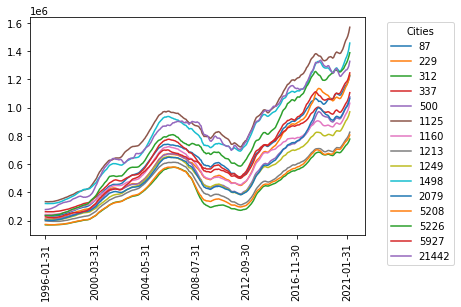

In [31]:
ala_zillow.columns
ala_zillow_HO = ala_zillow.drop(labels = ['RegionID', 'SizeRank', 'RegionName', 'City' , 'State', 'Metro',
       'CountyName'],  axis = 1)
%matplotlib inline
ala_zillow_HO.T.plot()
plt.xticks(rotation = 90)
plt.legend(title='Cities', bbox_to_anchor=(1.05, 1), loc='upper left')

#Replace Numbers in legend with City Name

#Geopandas Plot

Plot to view zillow price by area and create a sort of heat map to determine pricier locations. See if this can be done to adjust per timestamp value

In [32]:
geoset = geopandas.tools.geocode(ala_zillow["City"], timeout=None)

In [33]:
geoset = geoset.where(geoset["geometry"] != "GEOMETRYCOLLECTION EMPTY") #doesnt work because dtype is geomtry

# Loading Median Income Data, sorted by Zipcode


In [34]:
 income_data = pd.read_csv("/content/drive/MyDrive/HCT012.csv")

In [35]:
income_data

,GEO.id,Zip,GEO-label,Median Total,Median Owner occupied,Median Renter occupied
0,8600000US89439,89439,"89439 5-Digit ZCTA, 894 3-Digit ZCTA",57440,61964,24250
1,8600000US90001,90001,"90001 5-Digit ZCTA, 900 3-Digit ZCTA",24199,32703,20000
2,8600000US90002,90002,"90002 5-Digit ZCTA, 900 3-Digit ZCTA",22279,32729,16621
3,8600000US90003,90003,"90003 5-Digit ZCTA, 900 3-Digit ZCTA",22199,34254,17217
4,8600000US90004,90004,"90004 5-Digit ZCTA, 900 3-Digit ZCTA",27448,66429,23854
...,...,...,...,...,...,...
1752,8600000US96161,96161,"96161 5-Digit ZCTA, 961 3-Digit ZCTA",57691,63631,42652
1753,8600000US961HH,961HH,"961HH 5-Digit ZCTA, 961 3-Digit ZCTA",0,0,0
1754,8600000US961XX,961XX,"961XX 5-Digit ZCTA, 961 3-Digit ZCTA",48750,51250,34167
1755,8600000US97635,97635,"97635 5-Digit ZCTA, 976 3-Digit ZCTA",22396,24196,9375


In [37]:
zillow_data_ca_city = zillow_data_ca.drop_duplicates(subset = "City")
zillow_data_ca_city["RegionName"], income_data["Zip"]

(13       94109.0
 21       90250.0
 39       94565.0
 43       90046.0
 87       94501.0
           ...   
 29243    93287.0
 29466    93251.0
 29646    93605.0
 30400    94512.0
 30635    93435.0
 Name: RegionName, Length: 668, dtype: float64, 0       89439
 1       90001
 2       90002
 3       90003
 4       90004
         ...  
 1752    96161
 1753    961HH
 1754    961XX
 1755    97635
 1756    976HH
 Name: Zip, Length: 1757, dtype: object)

In [38]:
x = (income_data["Zip"])
discludeHH = x[x.str.contains('HH', regex=False)]
discludeXX = x[x.str.contains('XX', regex=False)]
disclude_all = np.array(discludeHH.append(discludeXX))
disclude_all

array(['900HH', '902HH', '904HH', '906HH', '907HH', '908HH', '910HH',
       '913HH', '917HH', '919HH', '920HH', '921HH', '922HH', '923HH',
       '925HH', '926HH', '927HH', '928HH', '930HH', '931HH', '932HH',
       '933HH', '934HH', '935HH', '936HH', '939HH', '940HH', '941HH',
       '943HH', '944HH', '945HH', '946HH', '947HH', '948HH', '949HH',
       '950HH', '951HH', '952HH', '953HH', '954HH', '955HH', '956HH',
       '957HH', '958HH', '959HH', '960HH', '961HH', '976HH', '907XX',
       '910XX', '913XX', '917XX', '919XX', '920XX', '922XX', '923XX',
       '925XX', '926XX', '928XX', '930XX', '931XX', '932XX', '933XX',
       '934XX', '935XX', '936XX', '939XX', '941XX', '945XX', '949XX',
       '952XX', '953XX', '954XX', '955XX', '956XX', '957XX', '959XX',
       '960XX', '961XX'], dtype=object)

In [39]:
x_numbers = [i for i in x if i not in disclude_all]
x_nums_int = [int(i) for i in x_numbers]
x_nums_int

[89439,
 90001,
 90002,
 90003,
 90004,
 90005,
 90006,
 90007,
 90008,
 90010,
 90011,
 90012,
 90013,
 90014,
 90015,
 90016,
 90017,
 90018,
 90019,
 90020,
 90021,
 90022,
 90023,
 90024,
 90025,
 90026,
 90027,
 90028,
 90029,
 90031,
 90032,
 90033,
 90034,
 90035,
 90036,
 90037,
 90038,
 90039,
 90040,
 90041,
 90042,
 90043,
 90044,
 90045,
 90046,
 90047,
 90048,
 90049,
 90056,
 90057,
 90058,
 90059,
 90061,
 90062,
 90063,
 90064,
 90065,
 90066,
 90067,
 90068,
 90069,
 90071,
 90077,
 90201,
 90210,
 90211,
 90212,
 90220,
 90221,
 90222,
 90230,
 90232,
 90240,
 90241,
 90242,
 90245,
 90247,
 90248,
 90249,
 90250,
 90254,
 90255,
 90260,
 90261,
 90262,
 90263,
 90265,
 90266,
 90270,
 90272,
 90274,
 90275,
 90277,
 90278,
 90280,
 90290,
 90291,
 90292,
 90293,
 90301,
 90302,
 90303,
 90304,
 90305,
 90401,
 90402,
 90403,
 90404,
 90405,
 90501,
 90502,
 90503,
 90504,
 90505,
 90601,
 90602,
 90603,
 90604,
 90605,
 90606,
 90620,
 90621,
 90623,
 90630,
 90631,


In [40]:
common_zips = np.transpose(np.array(set(x_nums_int).intersection(zillow_data_ca_city["RegionName"])))
common_zips

array({92201.0, 92210.0, 92220.0, 92223.0, 92225.0, 92230.0, 92234.0, 92236.0, 92239.0, 92240.0, 90201.0, 92252.0, 92253.0, 92254.0, 94303.0, 92256.0, 94305.0, 90210.0, 92260.0, 92262.0, 90220.0, 92270.0, 92274.0, 92276.0, 92277.0, 90230.0, 92282.0, 92284.0, 92285.0, 90241.0, 90245.0, 90247.0, 90250.0, 92301.0, 90254.0, 90255.0, 92305.0, 92308.0, 90260.0, 90262.0, 92311.0, 90265.0, 90266.0, 92314.0, 92316.0, 92313.0, 90270.0, 92315.0, 92320.0, 92317.0, 90274.0, 90275.0, 92324.0, 90277.0, 92325.0, 92327.0, 90280.0, 92333.0, 92336.0, 90290.0, 92339.0, 92341.0, 92342.0, 92345.0, 92346.0, 90301.0, 92354.0, 94403.0, 94404.0, 92356.0, 92358.0, 92359.0, 92363.0, 92365.0, 92371.0, 92372.0, 92373.0, 92376.0, 92382.0, 92392.0, 92397.0, 92398.0, 92399.0, 92407.0, 94501.0, 90405.0, 94507.0, 94508.0, 94509.0, 94510.0, 94511.0, 94512.0, 94513.0, 94514.0, 94515.0, 94517.0, 94521.0, 94523.0, 94525.0, 94526.0, 94530.0, 94533.0, 94536.0, 94544.0, 94546.0, 94547.0, 94549.0, 94550.0, 92503.0, 94553.0, 945